In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Financial_inclusion_dataset.csv')

In [4]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
df.relationship_with_head.value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [8]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
df.isna().sum()


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
df.gender_of_respondent.value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [11]:
from pandas_profiling import ProfileReport

<ipython-input-11-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [12]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.shape

(23524, 13)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

In [16]:
df['gender_of_respondent']= label_encoder.fit_transform(df['gender_of_respondent'])

In [17]:
df['cellphone_access']= label_encoder.fit_transform(df['cellphone_access'])

In [18]:
df['location_type']= label_encoder.fit_transform(df['location_type'])

In [19]:
df['bank_account']= label_encoder.fit_transform(df['bank_account'])

In [20]:
df['country']= label_encoder.fit_transform(df['country'])

In [21]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,0,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,0,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,0,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,0,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [22]:
df.country.value_counts()

1    8735
2    6620
0    6068
3    2101
Name: country, dtype: int64

In [23]:
df['relationship_with_head'].replace({'Head of Household': 1, 'Spouse': 2, 'Child':3,
                                      'Parent':4, 'Other relative':5, 'Other non-relatives':6}, inplace=True)

In [24]:
df.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [25]:
df['marital_status'].replace({'Married/Living together': 1,
                              'Single/Never Married': 2, 'Widowed':3, 'Divorced/Seperated':4, 'Dont know':5}, inplace=True)

In [26]:
df.education_level.value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [27]:
df['education_level'].replace({'Primary education': 1, 'No formal education': 2,
                               'Secondary education':3, 'Tertiary education':4, 'Vocational/Specialised training':5,
                                    'Other/Dont know/RTA':6}, inplace=True)

In [28]:
df.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [29]:
df['job_type'].replace({'Self employed': 1, 'Informally employed': 2, 'Farming and Fishing':3, 'Remittance Dependent':4, 'Other Income':5,
                                    'Formally employed Private':6,'No Income':7,'Formally employed Government':8,'Government Dependent':9,
                              'Dont Know/Refuse to answer':10}, inplace=True)

In [30]:
df.shape#df.drop(['year'], inplace = True, axis=1)

(23524, 13)

In [31]:
X = df.drop(['bank_account', 'uniqueid', 'year'], axis=1).values  # Features
y = df['bank_account'].values  # Target variable

In [32]:
X

array([[0, 0, 1, ..., 1, 3, 1],
       [0, 0, 0, ..., 3, 2, 9],
       [0, 1, 1, ..., 2, 5, 1],
       ...,
       [3, 0, 1, ..., 3, 1, 5],
       [3, 1, 1, ..., 4, 3, 1],
       [3, 0, 1, ..., 2, 3, 7]])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()


X = scaler.fit_transform(X)

In [35]:
X

array([[-1.29944427, -0.80006449,  0.58972136, ..., -0.88035656,
         1.04529126, -0.98537394],
       [-1.29944427, -0.80006449, -1.69571609, ...,  1.2265164 ,
         0.14223086,  3.30363275],
       [-1.29944427,  1.24989924,  0.58972136, ...,  0.17307992,
         2.85141205, -0.98537394],
       ...,
       [ 1.94351424, -0.80006449,  0.58972136, ...,  1.2265164 ,
        -0.76082954,  1.1591294 ],
       [ 1.94351424,  1.24989924,  0.58972136, ...,  2.27995287,
         1.04529126, -0.98537394],
       [ 1.94351424, -0.80006449,  0.58972136, ...,  0.17307992,
         1.04529126,  2.23138107]])

In [36]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=80)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [43]:
acc

0.8800097158124848

In [44]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7085
           1       0.68      0.26      0.38      1149

    accuracy                           0.88      8234
   macro avg       0.79      0.62      0.66      8234
weighted avg       0.86      0.88      0.86      8234



In [48]:
import seaborn as sns

<Axes: xlabel='Predicted', ylabel='Actual'>

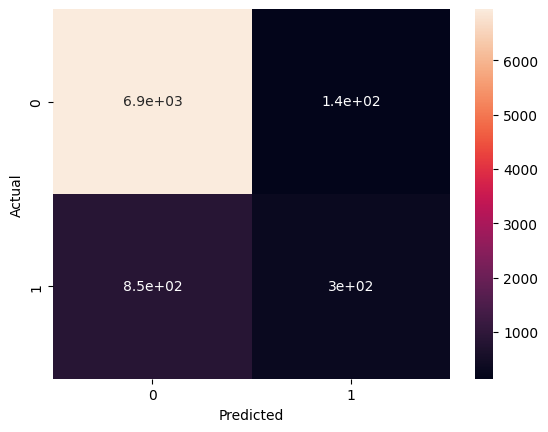

In [49]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [50]:
import pickle

pickle.dump(model, open ('model.sav', 'wb'))

In [51]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,0,1,3,24,0,2,1,3,1
1,0,2018,uniqueid_2,0,0,0,5,70,0,1,3,2,9
2,0,2018,uniqueid_3,1,1,1,5,26,1,5,2,5,1
3,0,2018,uniqueid_4,0,0,1,5,34,0,1,1,1,6
4,0,2018,uniqueid_5,0,1,0,8,26,1,3,2,1,2
